In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta

/Users/josephgreene/PycharmProjects/tripleleverage2p500/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [10]:
# Set the ticker symbol for the S&P 500
ticker_symbol = "^GSPC"

# Calculate the date 10 years ago from today
twenty_yrs_ago = datetime.now() - timedelta(days=20 * 365)

# Create a yfinance Ticker object
ticker = yf.Ticker(ticker_symbol)

# Fetch historical data
df = ticker.history(
    start=twenty_yrs_ago.strftime('%Y-%m-%d'),
    # period='max',
    interval="1d"
)
df.drop(columns=['Volume', 'Dividends', 'Stock Splits'], inplace=True)
df['PercentChange'] = ((df['Close'] - df['Open']) / df['Open']) * 100
df['NegChange'] = df['PercentChange'] < 0
df['NextDayNegChange'] = df['NegChange'].shift(1)

df.dropna(inplace=True)

In [11]:
df

,Open,High,Low,Close,PercentChange,NegChange,NextDayNegChange
Date,,,,,,,
2004-01-29 00:00:00-05:00,1128.479980,1134.390015,1122.380005,1134.109985,0.498902,False,True
2004-01-30 00:00:00-05:00,1134.109985,1134.170044,1127.729980,1131.130005,-0.262759,True,False
2004-02-02 00:00:00-05:00,1131.130005,1142.449951,1127.869995,1135.260010,0.365122,False,True
2004-02-03 00:00:00-05:00,1135.260010,1137.439941,1131.329956,1136.030029,0.067828,False,False
2004-02-04 00:00:00-05:00,1136.030029,1136.030029,1124.739990,1126.520020,-0.837127,True,False
...,...,...,...,...,...,...,...
2024-01-17 00:00:00-05:00,4739.129883,4744.229980,4714.819824,4739.209961,0.001690,False,True
2024-01-18 00:00:00-05:00,4760.100098,4785.790039,4740.569824,4780.939941,0.437803,False,False
2024-01-19 00:00:00-05:00,4796.279785,4842.069824,4785.870117,4839.810059,0.907584,False,False


In [46]:
import matplotlib.pyplot as plt

# Your existing code to calculate probabilities
_range = range(1, 50)  # Adjust this range as needed
_stats = {}
_nd_stats = {}
n_days = len(df)

for n in _range:
    # Check for n consecutive days of negative change
    df[f'{n}d_Neg∆'] = df['NegChange'].rolling(window=n).apply(lambda x: all(x), raw=False) #.astype(bool)

    # Check for n consecutive days of positive change
    df[f'{n}d_Pos∆'] = (~df['NegChange']).rolling(window=n).apply(lambda x: all(x), raw=False) #.astype(bool)

    # Calculating the probability of a positive day following 'n' negative days
    _stats[f'P(Pos|{n}d_Neg)'] = (~df[df[f'{n}d_Neg∆'].astype(bool)]['NextDayNegChange']).mean()

    # Calculating the probability of a negative day following 'n' positive days
    _stats[f'P(Neg|{n}d_Pos)'] = df[df[f'{n}d_Pos∆'].astype(bool)]['NextDayNegChange'].mean()
    _nd_stats[f'{n}d'] = {
        'pos': len(df[df[f"{n}d_Pos∆"].astype(bool)]),
        'neg': len(df[df[f"{n}d_Neg∆"].astype(bool)])
    }
    
    n_nan = n - 1
    _n_days = n_days - n_nan
    _stats[f'P({n}d_Pos∆)'] = sum(df[f'{n}d_Pos∆'].dropna()) / _n_days
    _stats[f'P({n}d_Neg∆)'] = sum(df[f'{n}d_Neg∆'].dropna()) / _n_days

# Separate the positive and negative probabilities for plotting
pos_probs = [_stats[f'P({n}d_Pos∆)'] for n in _range]
neg_probs = [_stats[f'P({n}d_Neg∆)'] for n in _range]
labels = [f'{n} Days' for n in _range]

/var/folders/_z/q4gsch7n2jn4pky14jnx_2p80000gn/T/ipykernel_72484/3160668799.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{n}d_Pos∆'] = (~df['NegChange']).rolling(window=n).apply(lambda x: all(x), raw=False) #.astype(bool)
/var/folders/_z/q4gsch7n2jn4pky14jnx_2p80000gn/T/ipykernel_72484/3160668799.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{n}d_Neg∆'] = df['NegChange'].rolling(window=n).apply(lambda x: all(x), raw=False) #.astype(bool)
/var/folders/_z/q4gsch7n2jn4pky14jnx_2p80000gn/T/ipykernel_72484/31

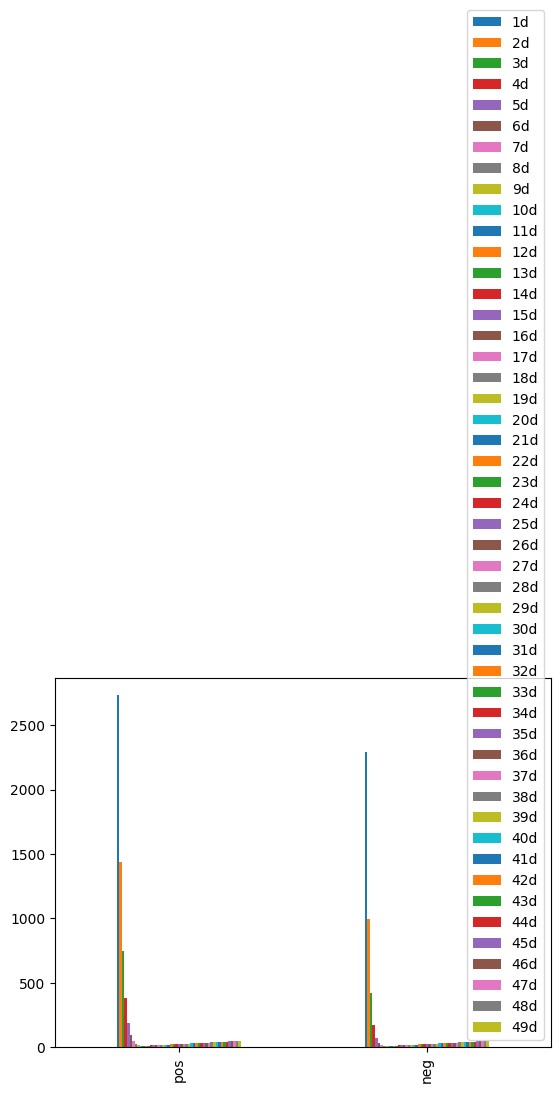

In [47]:
pd.DataFrame(_nd_stats).plot(kind='bar')
plt.show()

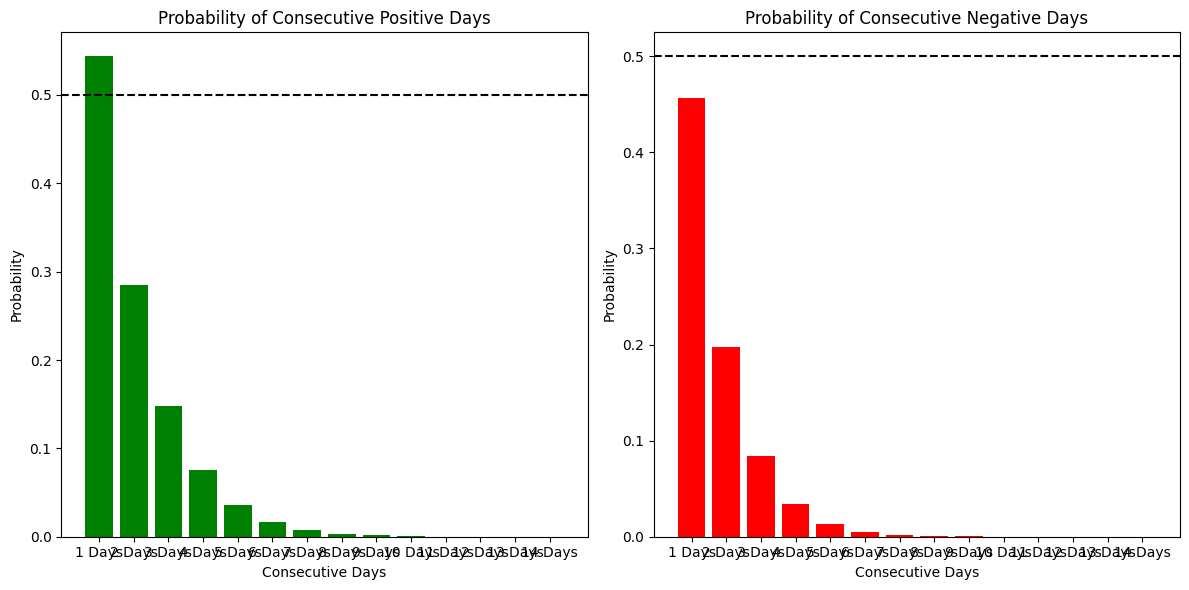

In [21]:
# Create bar charts
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot for positive changes
ax[0].bar(labels, pos_probs, color='green')
ax[0].set_title('Probability of Consecutive Positive Days')
ax[0].set_xlabel('Consecutive Days')
ax[0].set_ylabel('Probability')
ax[0].axhline(y=.5, color='black', linestyle='--')

# Plot for negative changes
ax[1].bar(labels, neg_probs, color='red')
ax[1].set_title('Probability of Consecutive Negative Days')
ax[1].set_xlabel('Consecutive Days')
ax[1].set_ylabel('Probability')
ax[1].axhline(y=.5, color='black', linestyle='--')


plt.tight_layout()
plt.show()


In [22]:
_stats

{'P(Pos|1d_Neg)': -1.4335511982570806,
 'P(Neg|1d_Pos)': 0.4756855575868373,
 'P(1d_Pos∆)': 0.5437375745526839,
 'P(1d_Neg∆)': 0.4562624254473161,
 'P(Pos|2d_Neg)': -2.0,
 'P(Neg|2d_Pos)': 0.0006968641114982578,
 'P(2d_Pos∆)': 0.28514615231656393,
 'P(2d_Neg∆)': 0.19785245575661164,
 'P(Pos|3d_Neg)': -1.9976303317535544,
 'P(Neg|3d_Pos)': 0.0013386880856760374,
 'P(3d_Pos∆)': 0.14817024661893397,
 'P(3d_Neg∆)': 0.08353221957040573,
 'P(Pos|4d_Neg)': -1.9942196531791907,
 'P(Neg|4d_Pos)': 0.005263157894736842,
 'P(4d_Pos∆)': 0.07499502685498309,
 'P(4d_Neg∆)': 0.033817386114979114,
 'P(Pos|5d_Neg)': -1.9714285714285715,
 'P(Neg|5d_Pos)': 0.010752688172043012,
 'P(5d_Pos∆)': 0.036211699164345405,
 'P(5d_Neg∆)': 0.013131715081575806,
 'P(Pos|6d_Neg)': -1.896551724137931,
 'P(Neg|6d_Pos)': 0.02197802197802198,
 'P(6d_Pos∆)': 0.01711442786069652,
 'P(6d_Neg∆)': 0.004776119402985075,
 'P(Pos|7d_Neg)': -1.8,
 'P(Neg|7d_Pos)': 0.06521739130434782,
 'P(7d_Pos∆)': 0.007961783439490446,
 'P(7d_Ne

In [23]:
# Preparing data for plotting
pos_after_neg_probs = [_stats.get(f'P(Pos|{n}d_Neg)', 0) for n in _range]
neg_after_pos_probs = [_stats.get(f'P(Neg|{n}d_Pos)', 0) for n in _range]
labels = [f'{n} Days' for n in _range]

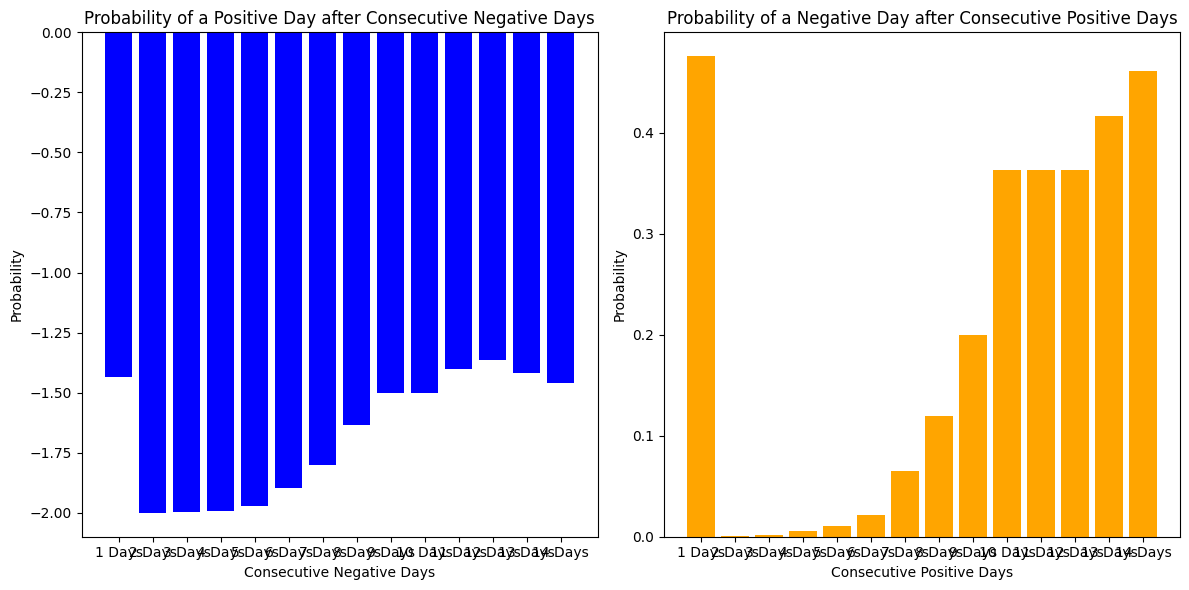

In [24]:
# Plotting the probabilities
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot for positive days after negative sequences
ax[0].bar(labels, pos_after_neg_probs, color='blue')
ax[0].set_title('Probability of a Positive Day after Consecutive Negative Days')
ax[0].set_xlabel('Consecutive Negative Days')
ax[0].set_ylabel('Probability')
# ax[0].axhline(y=0.5, color='black', linestyle='--')

# Plot for negative days after positive sequences
ax[1].bar(labels, neg_after_pos_probs, color='orange')
ax[1].set_title('Probability of a Negative Day after Consecutive Positive Days')
ax[1].set_xlabel('Consecutive Positive Days')
ax[1].set_ylabel('Probability')
# ax[1].axhline(y=0.5, color='black', linestyle='--')

plt.tight_layout()
plt.show()

In [48]:
import pandas as pd

# Example DataFrame df
# df = pd.DataFrame({'NegChange': [...]})  # Your DataFrame with the 'NegChange' column

_range = range(1, 5)  # Adjust this range as needed
stats = {}
n_days = len(df)

for n in _range:
    # Identifying sequences of 'n' consecutive negative days
    df[f'{n}d_Neg_Seq'] = df['NegChange'].rolling(window=n).apply(lambda x: all(x), raw=False)

    # Calculating the probability of a positive day following 'n' negative days
    # Shift the negative sequence to align with the day following the sequence
    following_day_is_positive = ~df['NegChange'].shift(-n)
    stats[f'P(Pos|{n}d_Neg)'] = (df[f'{n}d_Neg_Seq'] & following_day_is_positive).sum() / df[f'{n}d_Neg_Seq'].sum()

# Output the calculated probabilities
for key, value in stats.items():
    print(f"{key}: {value:.2f}")

TypeError: unsupported operand type(s) for &: 'float' and 'bool'

In [39]:
for i in _range:
    print(all(df[f'{i}d_Neg_Seq'] == df[f'{i}d_Neg∆']))

True
True
True
True
